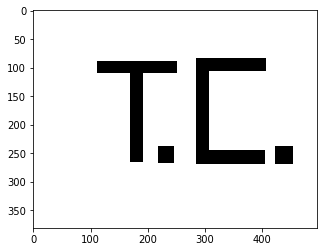

In [108]:
import numpy as np  #resmimizi gray level daha sonra bw aktarıcaz   t için e - 6   t için i - 2
import matplotlib.pyplot as plt
im1=plt.imread("3.png")
plt.imshow(im1)
plt.show()

In [109]:
def get_distance(v,w=[1/3,1/3,1/3]):   #w ağırlık değeri
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    #d=((a*w1)**2+(b*w2)**2+(c*w3)**2)**.5 #sqrt işlemi var
    d=((a**2)*w1+(b**2)*w2+(c**2)*w3)**.5
    return d


def convert_rgb_to_gray_level(im_1):
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im_2[i,j]=get_distance(im_1[i,j,:])
    return im_2

def convert_rgb_to_BW(image_gray_level):
    m=image_gray_level.shape[0]
    n=image_gray_level.shape[1]
    im_bw=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            if image_gray_level[i,j]==0:
                im_bw[i,j]=0
            else:
                im_bw[i,j]=1
    return im_bw

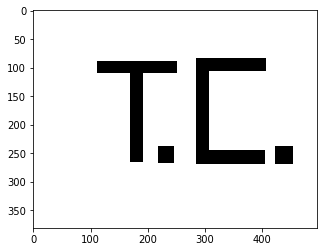

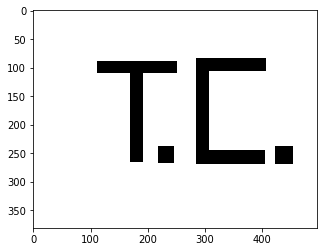

In [110]:
im2=convert_rgb_to_gray_level(im1)
plt.imshow(im2,cmap='gray')
plt.show()

im3=convert_rgb_to_BW(im2)
plt.imshow(im3,cmap='gray')
plt.show()

In [111]:
def pixel_compenent(resim):     #evde pixel compenenti ayrı fonksiyon yap ayır daha güzel olur
    m=resim.shape[0]   # siyah 0  beyaz 1 
    n=resim.shape[1]
    external=0
    internal=0
    for i in range (1,m-1):
        for j in range(1,n-1):
            poi=resim[i:i+2,j:j+2]
            siyah=0
            beyaz=0
            for k in range(2):
                for l in range(2):
                    if poi[k][l]==1:
                        beyaz=beyaz+1
                    else:
                        siyah=siyah+1
            if(siyah>beyaz and beyaz>0):
                internal=internal+1
            elif(beyaz>siyah and siyah>0):
                external=external+1
                
    print("dış kenar ",external)
    print("iç kenar ",internal)
    print("Nesne sayisi",(external-internal)/4)
    

In [112]:
pixel_compenent(im3)

dış kenar  20
iç kenar  4
Nesne sayisi 4.0


In [106]:
#Derste hocanın yaptığı mantık ile yapılma şekli 
#s=0
#for i in range(4):
#    if(my_block[i]==1):
#        s=s+2**i
#if s==8 or s==4 or s==2 or s==1:
#    return True      #External
#else:
#    return False     #Internal